# Business Data Analysis in Python (10 Business Questions)

# This Jupiter Notebook demonstrates a complete business focused data analysis workflow using python.


# Use Python to:

# Answer Real business questions 
# Clean and analyse data 
# Generate Insights
# Provide actionable business recommendations


# Business Question 1 : Which products and categories generate the highest and lowest sales?

# Business Question 2 : Which categories or regions are causing losses?

# Business Question 3 : Which regions perform best in sales and profit?

# Business Question 4 : Which customer segments generate the most revenue? 

# Business Question 5 : How do discounts affect profitability?

# Business Question 6 : Does shipping mode affect profitability?

# Business Question 7 : How do sales and profit change Over time?

# Business Question 8 : Which products should be discontinued?

# Business Question 9 : What is the average order value across regions?

# Business Question 10 : Where are the biggest growth oppurtunities?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
df = pd.read_csv('C:/Users/Chibueze/Valentine-Python-Project/PythonProject/Practical/Global_Superstore/superstore.csv')

df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [3]:
df.loc[:,'Order.ID':'Sales']

,Order.ID,Order.Priority,Product.ID,Product.Name,Profit,Quantity,Region,Row.ID,Sales
0,CA-2011-130813,High,OFF-PA-10002005,Xerox 225,9.3312,3,West,36624,19
1,CA-2011-148614,Medium,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,West,37033,19
2,CA-2011-118962,Medium,OFF-PA-10000659,"Adams Phone Message Book, Professional, 400 Me...",9.8418,3,West,31468,21
3,CA-2011-118962,Medium,OFF-PA-10001144,Xerox 1913,53.2608,2,West,31469,111
4,CA-2011-146969,High,OFF-PA-10002105,Xerox 223,3.1104,1,West,32440,6
...,...,...,...,...,...,...,...,...,...
51285,CA-2014-109701,High,OFF-BI-10000632,Satellite Sectional Post Binders,22.5732,2,West,33646,69
51286,CA-2014-109701,High,OFF-BI-10004187,Staples,3.1584,6,West,33645,9
51287,CA-2014-106964,Medium,OFF-BI-10000320,GBC Plastic Binding Combs,4.2804,2,West,32321,12
51288,CA-2014-145219,Critical,OFF-BI-10001670,Vinyl Sectional Post Binders,33.9300,3,West,35917,90


In [4]:
df.info()
df.shape
df.dtypes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

Category           object
City               object
Country            object
Customer.ID        object
Customer.Name      object
Discount          float64
Market             object
记录数                 int64
Order.Date         object
Order.ID           object
Order.Priority     object
Product.ID         object
Product.Name       object
Profit            float64
Quantity            int64
Region             object
Row.ID              int64
Sales               int64
Segment            object
Ship.Date          object
Ship.Mode          object
Shipping.Cost     float64
State              object
Sub.Category       object
Year                int64
Market2            object
weeknum             int64
dtype: object

In [5]:
# Cleaning Data

df['Order.Date'] = pd.to_datetime(df['Order.Date'])

df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

df['Sales'] = df['Sales'].astype(float)

df['Segment'] = df['Segment'].str.strip()

df['Ship.Mode'] = df['Ship.Mode'].str.strip()

df['Profit'] = df['Profit'].round(2)

df = df.rename(columns={
     'Customer.ID': 'Customer_id',
     'Customer.Name' : 'Customer_name',
     'Order.Date' : 'Order_date',
     'Order.ID' : 'Order_id',
     'Order.Priority' : 'Order_priority',
     'Product.ID' : 'Product_id',
     'Product.Name' : 'Product_name',
     'Row.ID' : 'Row_id',
     'Ship.Date' : 'Ship_date',
     'Ship.Mode' : 'Ship_mode',
     'Shipping.Cost' : 'Shipping_cost',
     'Sub.Category' : 'Sub-Category'

})

df['Region'] = df['Region'].replace({'EMEA': 'Europe & Middle East'})


In [6]:
df.dtypes

Category                  object
City                      object
Country                   object
Customer_id               object
Customer_name             object
Discount                 float64
Market                    object
记录数                        int64
Order_date        datetime64[ns]
Order_id                  object
Order_priority            object
Product_id                object
Product_name              object
Profit                   float64
Quantity                   int64
Region                    object
Row_id                     int64
Sales                    float64
Segment                   object
Ship_date         datetime64[ns]
Ship_mode                 object
Shipping_cost            float64
State                     object
Sub-Category              object
Year                       int64
Market2                   object
weeknum                    int64
dtype: object

**Business Question 1**:
- Which products and categories generate the highest and lowest sales?

In [7]:
df[['Category','Sub-Category', 'Sales']]

,Category,Sub-Category,Sales
0,Office Supplies,Paper,19.0
1,Office Supplies,Paper,19.0
2,Office Supplies,Paper,21.0
3,Office Supplies,Paper,111.0
4,Office Supplies,Paper,6.0
...,...,...,...
51285,Office Supplies,Binders,69.0
51286,Office Supplies,Binders,9.0
51287,Office Supplies,Binders,12.0
51288,Office Supplies,Binders,90.0


In [8]:
Category_Sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

Category_Sales

Category
Technology         4744691.0
Furniture          4110884.0
Office Supplies    3787330.0
Name: Sales, dtype: float64

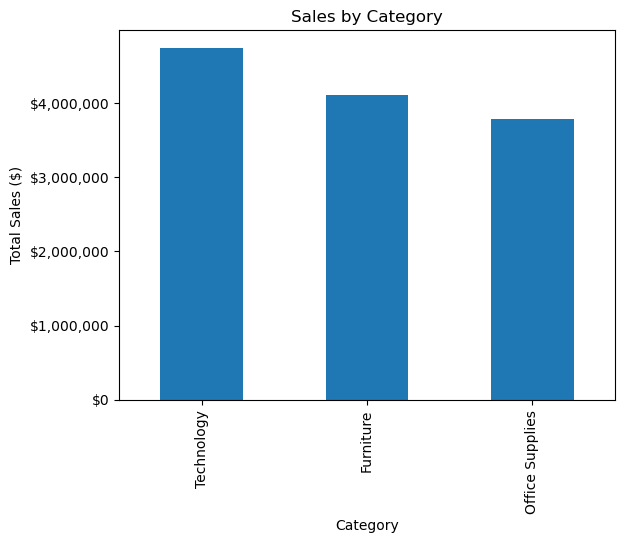

In [9]:
Category_Sales = Category_Sales.plot(kind='bar', title='Sales by Category')

Category_Sales.set_ylabel('Total Sales ($)')
Category_Sales.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.show()


💡 **Business Insight:**

- High variation exists in sales contribution across categories.

✅ **Recommendation:**

- Focus inventory and marketing spend on top-performing categories.

**Business Question 2**: 
- Which categories or regions are causing losses?

In [10]:
df[['Category', 'Region', 'Profit']]

,Category,Region,Profit
0,Office Supplies,West,9.33
1,Office Supplies,West,9.29
2,Office Supplies,West,9.84
3,Office Supplies,West,53.26
4,Office Supplies,West,3.11
...,...,...,...
51285,Office Supplies,West,22.57
51286,Office Supplies,West,3.16
51287,Office Supplies,West,4.28
51288,Office Supplies,West,33.93


In [11]:
Loss_categories = df[df['Profit'] < 0].groupby('Category')['Profit'].sum()

Loss_categories

Category
Furniture         -370169.22
Office Supplies   -263982.02
Technology        -286495.44
Name: Profit, dtype: float64

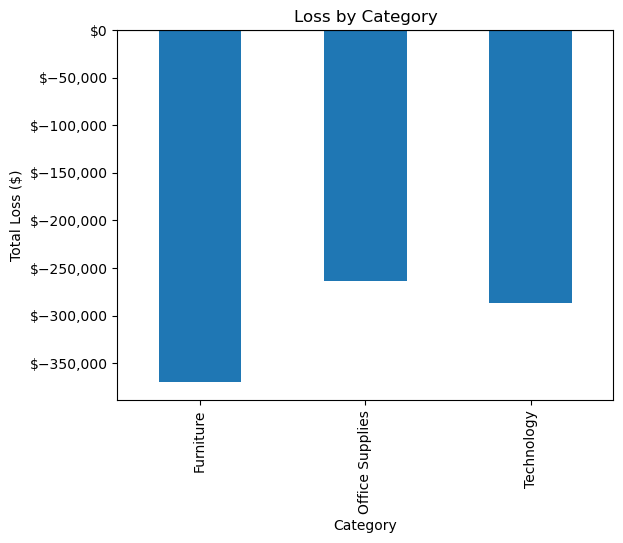

In [12]:
Loss_categories = Loss_categories.plot(kind='bar', title='Loss by Category')
Loss_categories.set_ylabel('Total Loss ($)')
Loss_categories.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
Loss_categories.axhline(0, color='black')   # reference line
plt.show()


💡 **Business Insight:**

- Some categories consistently operate at a loss.

✅ **Recommendation:**

- Re-evaluate pricing, discounts, or discontinue unprofitable products.

**Business Question 3**:
- Which regions perform best in sales and profit?

In [13]:
df[['Region', 'Sales', 'Profit']]

,Region,Sales,Profit
0,West,19.0,9.33
1,West,19.0,9.29
2,West,21.0,9.84
3,West,111.0,53.26
4,West,6.0,3.11
...,...,...,...
51285,West,69.0,22.57
51286,West,9.0,3.16
51287,West,12.0,4.28
51288,West,90.0,33.93


In [14]:
Region_performance = df.groupby('Region')[['Sales','Profit']].sum().round(2).sort_values(by='Sales', ascending= False)

Region_performance

,Sales,Profit
Region,,
Central,2822399.0,311403.75
South,1600960.0,140355.76
North,1248192.0,194598.08
Oceania,1100207.0,120088.89
Southeast Asia,884438.0,17852.49
North Asia,848349.0,165578.35
Europe & Middle East,806184.0,43897.99
Africa,783776.0,88871.49
Central Asia,752839.0,132480.18


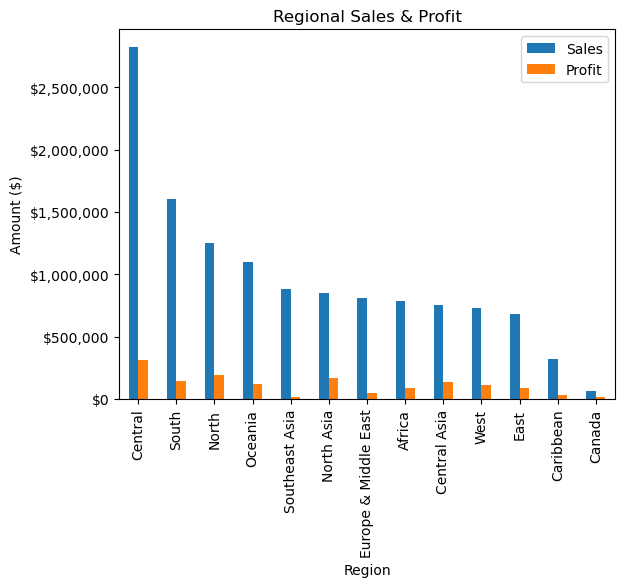

In [15]:
Region_performance = Region_performance.plot(kind='bar', title='Regional Sales & Profit')
Region_performance.set_ylabel('Amount ($)')
Region_performance.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.show()

💡 **Business Insight:** 

- Sales and profit vary significantly by region.

✅ **Recommendation:**

- Scale operations and marketing in high-performing regions.


**Business Question 4**:
- Which customer segments generate the most revenue?

In [16]:
df[['Segment', 'Sales']]

,Segment,Sales
0,Consumer,19.0
1,Consumer,19.0
2,Consumer,21.0
3,Consumer,111.0
4,Consumer,6.0
...,...,...
51285,Corporate,69.0
51286,Corporate,9.0
51287,Home Office,12.0
51288,Home Office,90.0


In [17]:
Segment_performance = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

Segment_performance

Segment
Consumer       6508141.0
Corporate      3824808.0
Home Office    2309956.0
Name: Sales, dtype: float64

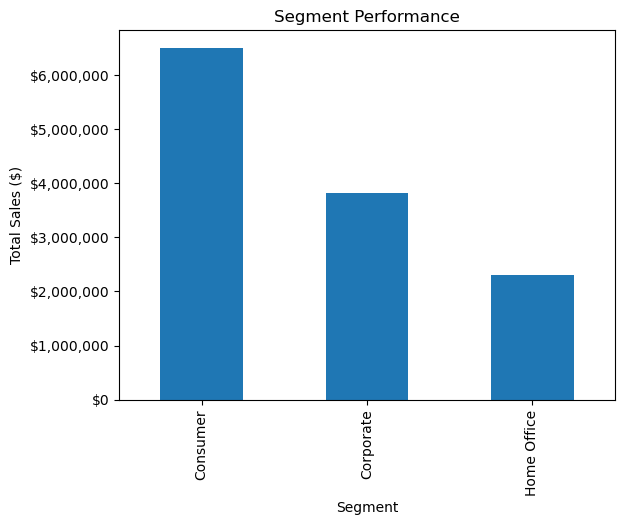

In [18]:
Segment_performance = Segment_performance.plot(kind='bar', title='Segment Performance')
Segment_performance.set_ylabel('Total Sales ($)')
Segment_performance.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.show()

💡 **Business Insight:**   

- Certain segments dominate revenue and profit.

✅ **Recommendation:** 

- Develop retention strategies for high-value segments.

**Business Question 5**: 
- How do discounts affect profitability?

In [19]:
df[['Discount', 'Profit']]

,Discount,Profit
0,0.0,9.33
1,0.0,9.29
2,0.0,9.84
3,0.0,53.26
4,0.0,3.11
...,...,...
51285,0.2,22.57
51286,0.2,3.16
51287,0.2,4.28
51288,0.2,33.93


In [20]:
Discount_profit = df.groupby('Discount')['Profit'].mean()

Discount_profit

Discount
0.000      61.039494
0.002     125.762798
0.070     140.990133
0.100      63.683341
0.150      50.602348
0.170      38.317197
0.200      23.552679
0.202     -14.518537
0.250       4.043485
0.270      -4.317268
0.300     -57.899588
0.320     -88.561481
0.350    -116.144590
0.370     -78.462027
0.400     -45.246616
0.402    -109.907981
0.450     -41.610856
0.470     -42.982331
0.500     -97.140245
0.550    -315.068000
0.570    -526.129167
0.600     -81.732178
0.602    -213.279130
0.650    -365.998235
0.700    -104.339670
0.800    -122.203449
0.850   -1534.330000
Name: Profit, dtype: float64

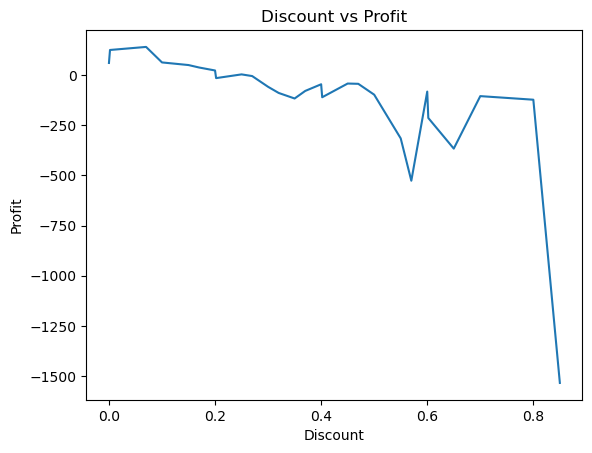

In [21]:
Discount_profit = Discount_profit.plot(kind='line', title='Discount vs Profit')
Discount_profit.set_ylabel('Profit')
plt.show()

💡 **Business Insight:** 

- Higher discounts generally reduce average profit.


✅ **Recommendation:** 

- Implement discount limits to protect margins.


**Business Question 6**:
- Does shipping mode affect profitability?

In [22]:
df[['Ship_mode', 'Profit']]

,Ship_mode,Profit
0,Second Class,9.33
1,Standard Class,9.29
2,Standard Class,9.84
3,Standard Class,53.26
4,Standard Class,3.11
...,...,...
51285,Same Day,22.57
51286,Same Day,3.16
51287,First Class,4.28
51288,First Class,33.93


In [23]:
Ship_profit = df.groupby('Ship_mode')['Profit'].agg(Total_profit= 'sum', Average_profit= 'mean').round(2)

Ship_profit

,Total_profit,Average_profit
Ship_mode,,
First Class,208104.62,27.73
Same Day,76173.20,28.20
Second Class,292582.91,28.38
Standard Class,890595.79,28.94


💡 **Business Insight:** 

- Some shipping modes are less profitable.

✅ **Recommendation:** 

- Optimize shipping choices based on cost and margin impact.

**Business Question 7**:
- How do sales and profit change Over time?

In [24]:
df[['Order_date','Sales', 'Profit']]

,Order_date,Sales,Profit
0,2011-01-07,19.0,9.33
1,2011-01-21,19.0,9.29
2,2011-08-05,21.0,9.84
3,2011-08-05,111.0,53.26
4,2011-09-29,6.0,3.11
...,...,...,...
51285,2014-12-03,69.0,22.57
51286,2014-12-03,9.0,3.16
51287,2014-12-18,12.0,4.28
51288,2014-12-25,90.0,33.93


In [25]:
Monthly_trend = df.resample('ME', on='Order_date')[['Sales','Profit']].sum()

Monthly_trend

,Sales,Profit
Order_date,,
2011-01-31,98902.0,8321.78
2011-02-28,91152.0,12417.89
2011-03-31,145726.0,15303.55
2011-04-30,116927.0,12902.31
2011-05-31,146762.0,12183.85
2011-06-30,215214.0,23415.11
2011-07-31,115518.0,5585.02
2011-08-31,207570.0,23713.61
2011-09-30,290230.0,35776.86


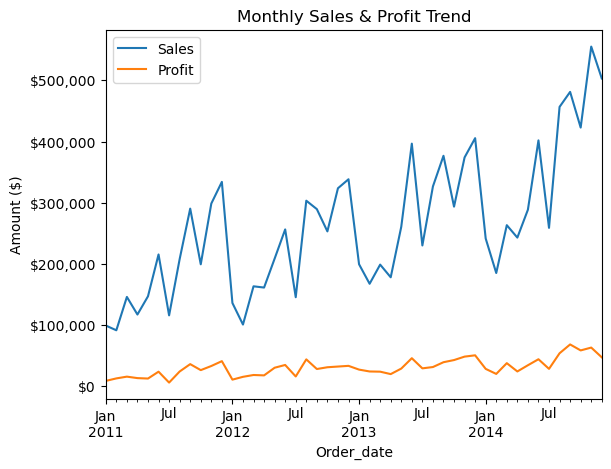

In [26]:
Monthly_trend = Monthly_trend.plot(title='Monthly Sales & Profit Trend')
Monthly_trend.set_ylabel('Amount ($)')
Monthly_trend.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.show()

💡 **BUsiness Insight:** 

- Seasonal trends are present.



✅ **Recommendation:** 

- Align promotions and inventory planning with peak periods.

**Business Question 8**: 
- Which products should be discontinued?

In [27]:
df[['Sub-Category','Sales','Profit']]

,Sub-Category,Sales,Profit
0,Paper,19.0,9.33
1,Paper,19.0,9.29
2,Paper,21.0,9.84
3,Paper,111.0,53.26
4,Paper,6.0,3.11
...,...,...,...
51285,Binders,69.0,22.57
51286,Binders,9.0,3.16
51287,Binders,12.0,4.28
51288,Binders,90.0,33.93


In [28]:
Bad_product = df.groupby('Sub-Category')[['Sales','Profit']].sum()

Bad_product = Bad_product[Bad_product['Profit'] < 0]

Bad_product

,Sales,Profit
Sub-Category,,
Tables,757034.0,-64083.49


💡 **Business Insight:**

- Some products consistently generate losses.



✅ **Recommendation:** 

- Discontinue or redesign underperforming products.

**Business Question 9**:
- What is the average order value across regions?

In [29]:
df[['Region','Sales']]

,Region,Sales
0,West,19.0
1,West,19.0
2,West,21.0
3,West,111.0
4,West,6.0
...,...,...
51285,West,69.0
51286,West,9.0
51287,West,12.0
51288,West,90.0


In [30]:
AOV = df.groupby('Region')['Sales'].mean().round(2)

AOV

Region
Africa                  170.87
Canada                  174.30
Caribbean               191.88
Central                 253.88
Central Asia            367.60
East                    238.35
Europe & Middle East    160.31
North                   260.86
North Asia              362.85
Oceania                 315.52
South                   240.93
Southeast Asia          282.66
West                    226.51
Name: Sales, dtype: float64

💡 **Business Insight:**

- Certain regions place higher-value orders.

✅ **Recommendation:** 

- Apply upselling strategies in high-AOV regions.

**Business Question 10**:
- Where are the biggest growth opportunities?

In [31]:
df[['Region','Sales','Profit']]

,Region,Sales,Profit
0,West,19.0,9.33
1,West,19.0,9.29
2,West,21.0,9.84
3,West,111.0,53.26
4,West,6.0,3.11
...,...,...,...
51285,West,69.0,22.57
51286,West,9.0,3.16
51287,West,12.0,4.28
51288,West,90.0,33.93


In [32]:
growth_opportunities = (df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False))

growth_opportunities


,Sales,Profit
Region,,
Central,2822399.0,311403.75
North,1248192.0,194598.08
North Asia,848349.0,165578.35
South,1600960.0,140355.76
Central Asia,752839.0,132480.18
Oceania,1100207.0,120088.89
West,725514.0,108418.31
East,678834.0,91522.50
Africa,783776.0,88871.49


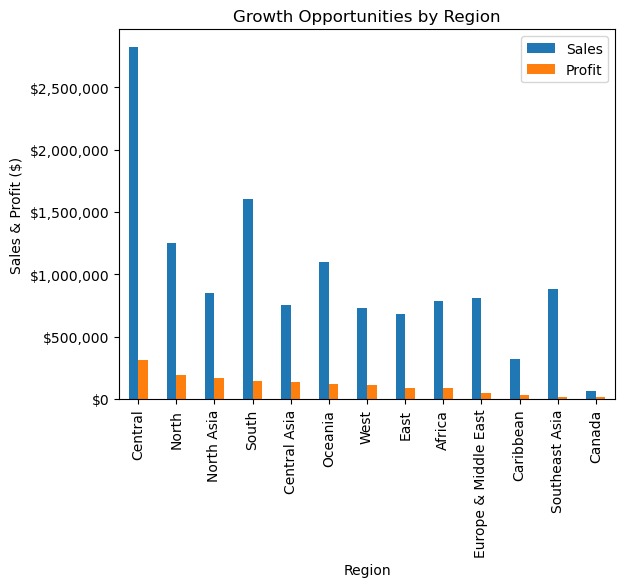

In [33]:
growth_opportunities = growth_opportunities.plot(kind='bar', title='Growth Opportunities by Region')
growth_opportunities.set_ylabel('Sales & Profit ($)')
growth_opportunities.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))   
plt.show()


💡 **Business Insight:** 

- Regions with high profitability but relatively lower sales indicate strong growth potential. 
- These regions are performing efficiently but may be under-invested.


✅ **Recommendation:** 

- Prioritize marketing, expansion, and resource allocation in high-profit regions.
- Use category-level analysis as a drill-down to identify specific product opportunities within selected regions.
